In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [2]:
data=pd.read_csv(r'E:\blessy\ict\StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
#Find out how many males and females participated in the test

In [5]:
gender_count=data['gender'].value_counts()


In [6]:
print('Number of males',gender_count['male'])
print('Number of females',gender_count['female'])

Number of males 482
Number of females 518


In [7]:
# What do you think about the students' parental level of education

Text(0, 0.5, 'number of students')

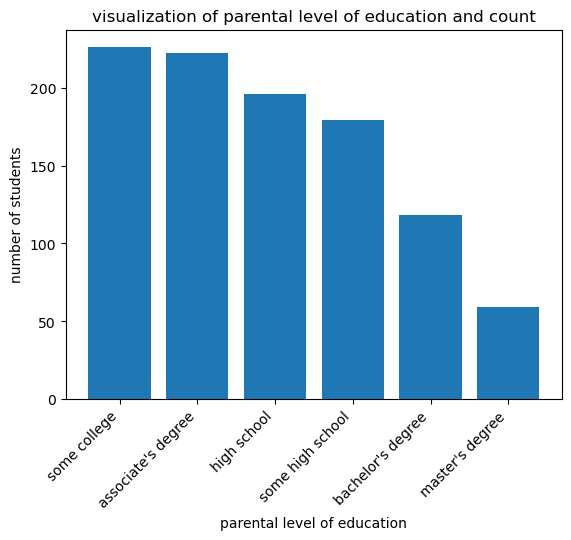

In [8]:
parental_edu_count=data['parental level of education'].value_counts()
plt.bar(parental_edu_count.index,parental_edu_count.values)
plt.xticks(rotation=45,ha='right')
plt.title('visualization of parental level of education and count')
plt.xlabel('parental level of education')
plt.ylabel('number of students')

In [9]:
#Who scores the most on average for math, reading and writing based on
#● Gender
#● Test preparation course

In [23]:
gender_mean=data.groupby('gender').mean(numeric_only=True)[['math score','reading score','writing score']]
test_preparation_mean=data.groupby('test preparation course').mean(numeric_only=True)[['math score','reading score','writing score']]
print('Mean score by gender\n',gender_mean)
print('Mean score by test preparation course\n',test_preparation_mean)

Mean score by gender
         math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058
Mean score by test preparation course
                          math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


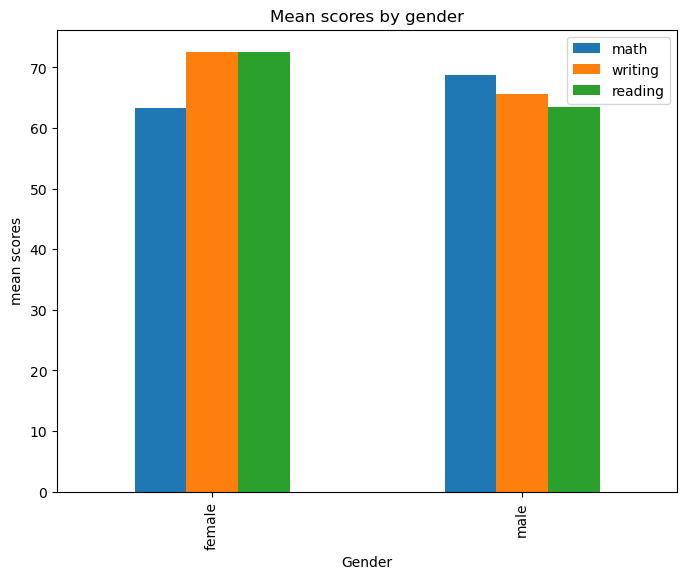

In [22]:
gender_mean.plot(kind='bar',figsize=(8,6))
plt.title('Mean scores by gender')
plt.xlabel('Gender')
plt.ylabel('mean scores')
plt.legend(['math','writing','reading'])
plt.show()

Based on gender female score high in writing and reading but male score almost equal average scores in math score,reading and writing.

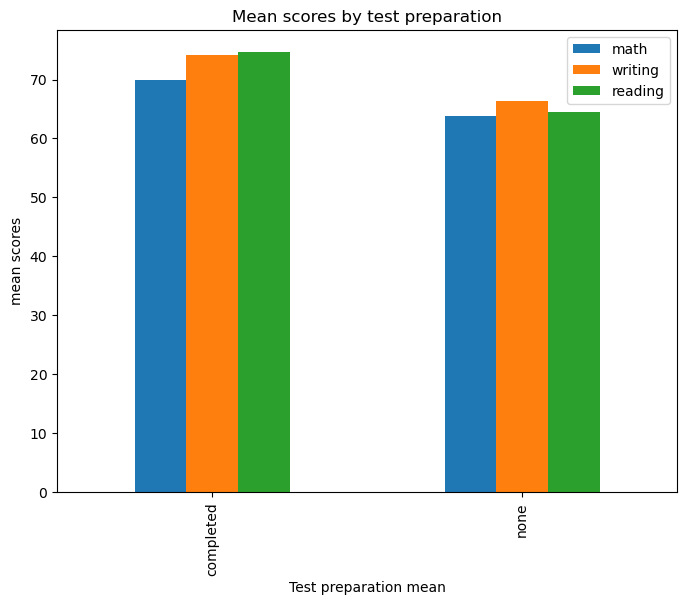

In [28]:
test_preparation_mean.plot(kind='bar',figsize=(8,6))
plt.title('Mean scores by test preparation')
plt.xlabel('Test preparation mean')
plt.ylabel('mean scores')
plt.legend(['math','writing','reading'])
plt.show()

Those who completed the test preparation course have high average compared to none.

In [ ]:
#What do you think about the scoring variation for math, reading and writing
#based on
#● Gender
#● Test preparation course

In [32]:
gender_std=data.groupby('gender').std(numeric_only=True)[['math score','writing score','reading score']]
test_std=data.groupby('test preparation course').std(numeric_only=True)[['math score','reading score','writing score']]
print('Standard deviation by gender',gender_std)
print('standard deviation by test preparation',test_std)

Standard deviation by gender         math score  writing score  reading score
gender                                          
female   16.029928      14.844842      14.411018
male     14.556411      14.227225      14.149594
standard deviation by test preparation                          math score  reading score  writing score
test preparation course                                          
completed                 14.521847      13.537572      13.236412
none                      15.705689      14.608896      15.041667


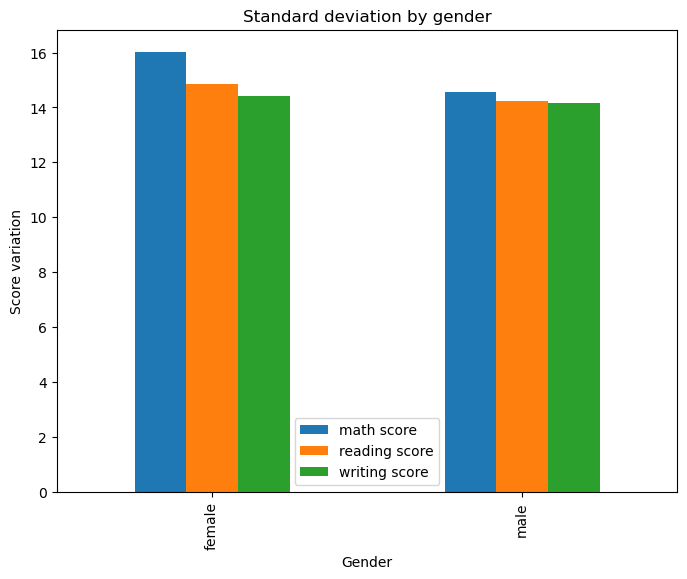

In [42]:
gender_std.plot(kind='bar',figsize=(8,6))
plt.title('Standard deviation by gender')
plt.xlabel('Gender')
plt.ylabel('Score variation')
plt.legend(['math score','reading score','writing score'])
plt.show()

Male students have less score variation compared to females

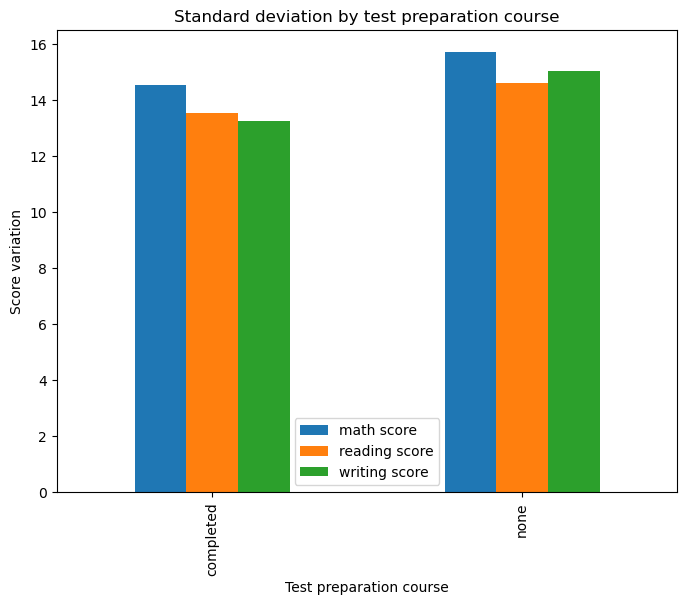

In [43]:
test_std.plot(kind='bar',figsize=(8,6))
plt.title('Standard deviation by test preparation course')
plt.xlabel('Test preparation course')
plt.ylabel('Score variation')
plt.legend(['math score','reading score','writing score'])
plt.show()

The students who completed the test preparation course have less score variation compared to others 

In [38]:
#The management needs your help to give bonus points to the top 25% of
#students based on their math score, so how will you help the management
#to achieve thi

In [50]:
data['math score'].quantile(0.75)
top_25=data[data['math score']>=77].sort_values('math score',ascending=False)


In [51]:
top_25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
997,male,group D,some college,standard,completed,100,97,99
996,male,group A,some college,standard,completed,100,96,86
517,female,group E,associate's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69
855,male,group E,associate's degree,free/reduced,completed,77,69,68
856,male,group E,some high school,standard,completed,77,76,77
415,female,group B,master's degree,free/reduced,completed,77,97,94


These are the top 25% of students based on their math score

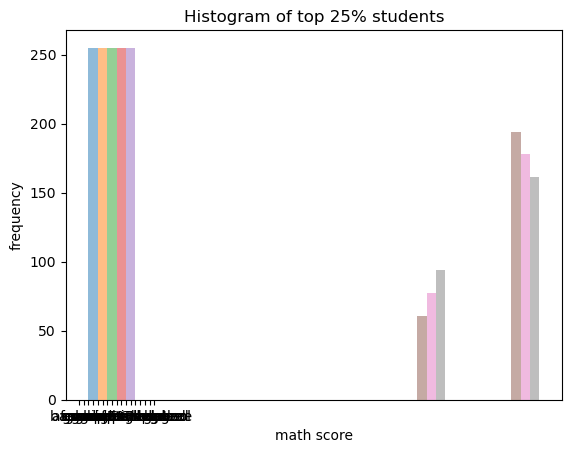

In [60]:
plt.hist(top_25,bins=5,alpha=0.5)
plt.title('Histogram of top 25% students')
plt.xlabel('math score')
plt.ylabel('frequency')
plt.show()